### Gold data Collection & Pre-processing

### Gold Price Dataset
Below are the columns names in the dataset and their meaning
* Date: A unique identifier for each trading day.
* Close: Closing price of gold on the respective date.
* Volume: Gold trading volume on the corresponding date.
* Open: Opening price of gold on the respective date.
* High: The highest recorded price of gold during the trading day.
* Low: The lowest price recorded for gold in the trading day.


In [216]:
# importing all the required library
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [217]:
#import Gold the dataset
gold_price = pd.read_csv('datafile/marketwatchdir/numeric_data/Gold_data.csv')

In [218]:
#make a copy of the gold historical price dataset
df_gold_price = gold_price.copy()


In [219]:
#display first few records on the gold_price dataframe
df_gold_price.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,10/18/2024,"2,736.60","2,708.75","2,737.75","2,708.05",NaN,1.07%
1,10/17/2024,"2,707.50","2,690.40","2,712.70","2,688.20",181.82K,0.60%
2,10/16/2024,"2,691.30","2,679.50","2,702.50","2,674.90",156.88K,0.46%
3,10/15/2024,"2,678.90","2,663.50","2,685.90","2,654.40",160.56K,0.50%
4,10/14/2024,"2,665.60","2,673.10","2,684.20","2,660.00",123.36K,-0.40%


In [220]:
#display is dimension
df_gold_price.shape

(3774, 7)

In [221]:
df_gold_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3774 non-null   object
 1   Price     3774 non-null   object
 2   Open      3774 non-null   object
 3   High      3774 non-null   object
 4   Low       3774 non-null   object
 5   Vol.      3770 non-null   object
 6   Change %  3774 non-null   object
dtypes: object(7)
memory usage: 206.5+ KB


In [222]:
# change the data datatype from object to datetime
df_gold_price['Date']=pd.to_datetime(df_gold_price['Date'])
df_gold_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3774 non-null   datetime64[ns]
 1   Price     3774 non-null   object        
 2   Open      3774 non-null   object        
 3   High      3774 non-null   object        
 4   Low       3774 non-null   object        
 5   Vol.      3770 non-null   object        
 6   Change %  3774 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 206.5+ KB


In [223]:
# date range in consideration for the analysis
all_dates = pd.date_range(start='2015-01-01', end='2024-10-1', freq='D')


In [224]:
# applying the data range on the gold data 
df_gold_price = df_gold_price.set_index('Date').reindex(all_dates).rename_axis('Date').reset_index()
print(df_gold_price)

           Date     Price      Open      High       Low     Vol. Change %
0    2015-01-01       NaN       NaN       NaN       NaN      NaN      NaN
1    2015-01-02  1,186.20  1,184.00  1,194.90  1,167.30  120.68K    0.18%
2    2015-01-03       NaN       NaN       NaN       NaN      NaN      NaN
3    2015-01-04       NaN       NaN       NaN       NaN      NaN      NaN
4    2015-01-05  1,204.00  1,187.80  1,207.50  1,177.80  149.11K    1.50%
...         ...       ...       ...       ...       ...      ...      ...
3557 2024-09-27  2,668.10  2,695.10  2,696.90  2,665.30  196.73K   -0.55%
3558 2024-09-28       NaN       NaN       NaN       NaN      NaN      NaN
3559 2024-09-29       NaN       NaN       NaN       NaN      NaN      NaN
3560 2024-09-30  2,659.40  2,680.50  2,687.70  2,646.20  173.25K   -0.33%
3561 2024-10-01  2,690.30  2,656.10  2,694.70  2,653.80  202.76K    1.16%

[3562 rows x 7 columns]


In [225]:
#check for NULL values
df_gold_price.isnull().sum()


Date           0
Price       1061
Open        1061
High        1061
Low         1061
Vol.        1063
Change %    1061
dtype: int64

In [226]:
df_gold_price.dropna(inplace=True)

In [227]:
df_gold_price.head()

,Date,Price,Open,High,Low,Vol.,Change %
1,2015-01-02,"1,186.20","1,184.00","1,194.90","1,167.30",120.68K,0.18%
4,2015-01-05,"1,204.00","1,187.80","1,207.50","1,177.80",149.11K,1.50%
5,2015-01-06,"1,219.40","1,204.00","1,223.30","1,201.60",190.36K,1.28%
6,2015-01-07,"1,210.70","1,219.00","1,219.40","1,209.10",117.09K,-0.71%
7,2015-01-08,"1,208.50","1,211.00","1,216.80","1,204.20",122.49K,-0.18%


In [228]:
df_gold_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2499 entries, 1 to 3561
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2499 non-null   datetime64[ns]
 1   Price     2499 non-null   object        
 2   Open      2499 non-null   object        
 3   High      2499 non-null   object        
 4   Low       2499 non-null   object        
 5   Vol.      2499 non-null   object        
 6   Change %  2499 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 156.2+ KB


In [229]:
#check for duplicated records
df_gold_price[df_gold_price.duplicated()]


,Date,Price,Open,High,Low,Vol.,Change %


In [230]:
# select the required columns 
df_gold_price= df_gold_price[['Date','Price']]

In [231]:
# renaming the column name
df_gold_price.rename(columns={'Date':'date','Price':'gold_price'}, inplace=True)

In [232]:
df_gold_price.dtypes

date          datetime64[ns]
gold_price            object
dtype: object

In [233]:
df_gold_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2499 entries, 1 to 3561
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2499 non-null   datetime64[ns]
 1   gold_price  2499 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 58.6+ KB


In [234]:
# remove comma in the gold price value to allow convertion to float
df_gold_price['gold_price'] = df_gold_price['gold_price'].str.replace(',','')  #remove commas

In [235]:
# change the datatype from object to float
df_gold_price['gold_price'] = pd.to_numeric(df_gold_price['gold_price'], errors = 'coerce')
df_gold_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2499 entries, 1 to 3561
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2499 non-null   datetime64[ns]
 1   gold_price  2499 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 58.6 KB


In [236]:
# Function to the gold price distribution
def visualize_numeric(df):
    numeric_cols = df.select_dtypes(include=['float64']).columns
    
    # Histogram for each numeric variable
    df[numeric_cols].hist(figsize=(8, 6), bins=20)
    plt.suptitle('Histograms of Numeric Variables')
    plt.show()

    # Box plots for each numeric variable
    plt.figure(figsize=(8, 6))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(len(numeric_cols), 1, i)
        sns.boxplot(x=df[col])
        plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()


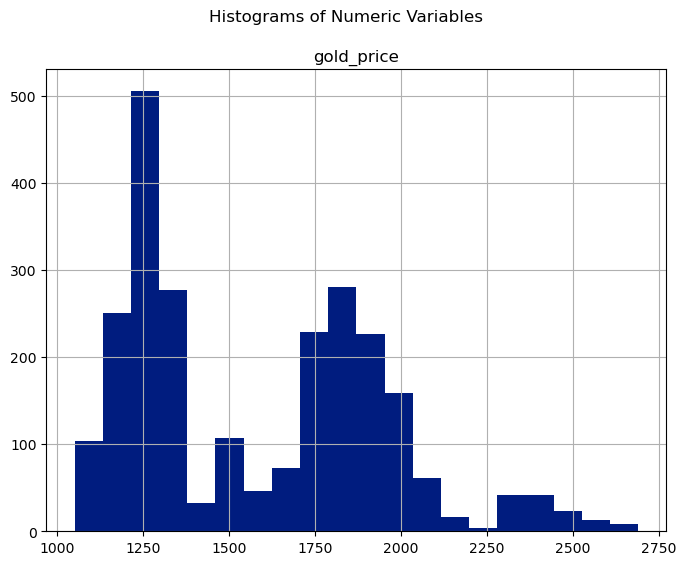

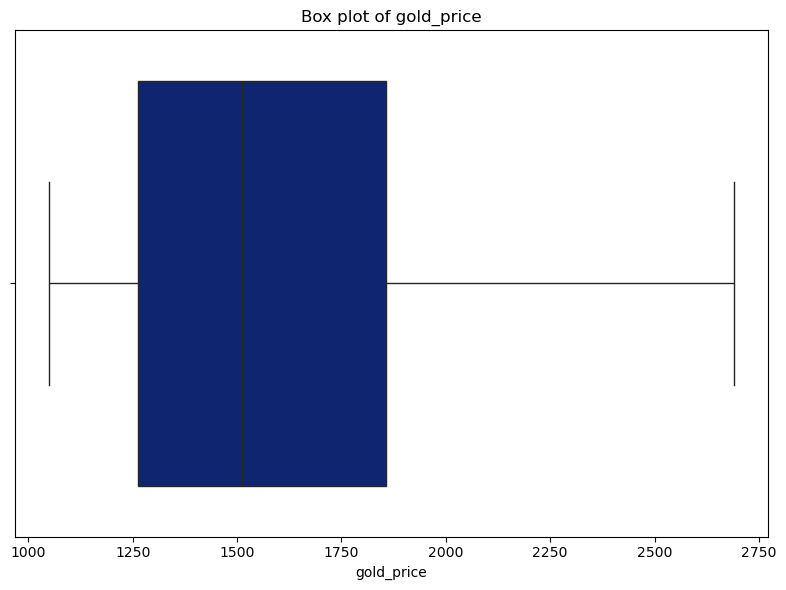

In [237]:
# Call the function to visualize the gold price dataset
visualize_numeric(df_gold_price)

In [238]:
df_gold_price.shape

(2499, 2)

In [239]:
df_gold_price.describe()

,date,gold_price
count,2499,2499.000000
mean,2019-11-23 00:54:44.513805312,1582.865506
min,2015-01-02 00:00:00,1049.600000
25%,2017-06-24 12:00:00,1262.750000
50%,2019-11-25 00:00:00,1511.700000
75%,2022-04-27 12:00:00,1857.600000
max,2024-10-01 00:00:00,2690.300000
std,NaN,361.865406


<Figure size 1400x700 with 0 Axes>

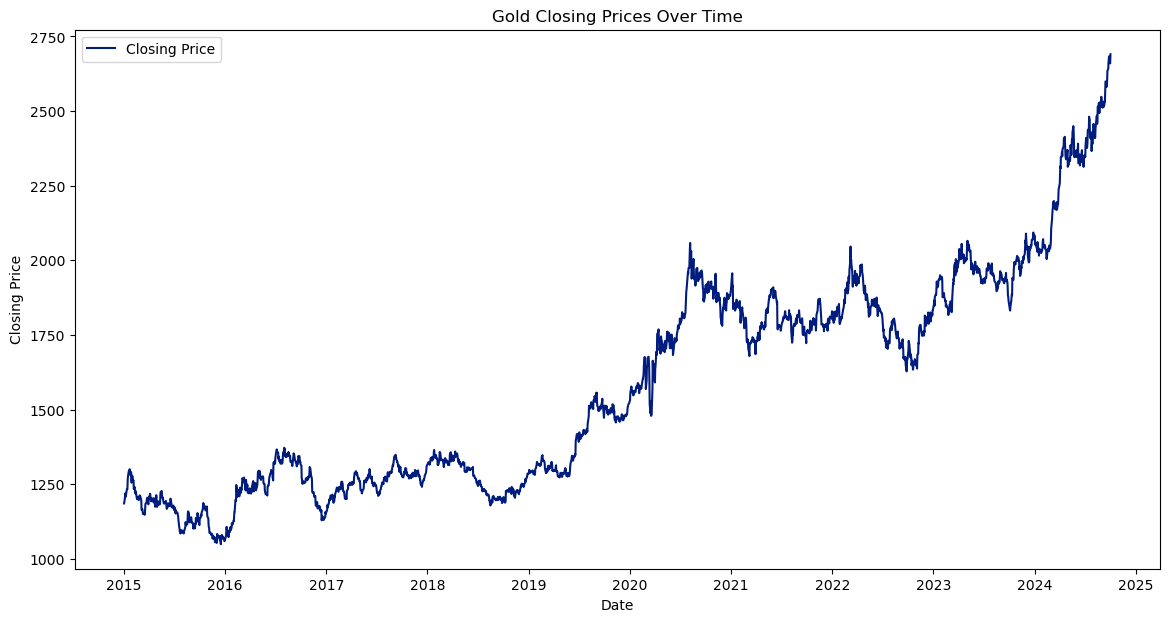

In [240]:
# visualization of the gold closing price over time
plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(14, 7))

plt.figure(figsize=(14, 7))
plt.plot(df_gold_price['date'],df_gold_price['gold_price'],label='Closing Price')
plt.title('Gold Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show();

In [241]:
# display dataframe content
df_gold_price.head()

,date,gold_price
1,2015-01-02,1186.2
4,2015-01-05,1204.0
5,2015-01-06,1219.4
6,2015-01-07,1210.7
7,2015-01-08,1208.5


In [272]:
# check for any missing values
df_gold_price.isnull().sum()

date          0
gold_price    0
dtype: int64

In [243]:
#export the final  dataset to csv for unward analysis
df_gold_price.to_csv('result_Data/gold_dataset.csv', index=False)